# Assignment 2

## Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Part 1

Number of instances: 1460
Number of features: 81
Number of categorical features: 43
Number of numerical features: 38

Top 5 features and their correlation values
OverallQual: 0.7910
GrLivArea: 0.7086
GarageCars: 0.6404
GarageArea: 0.6234
TotalBsmtSF: 0.6136


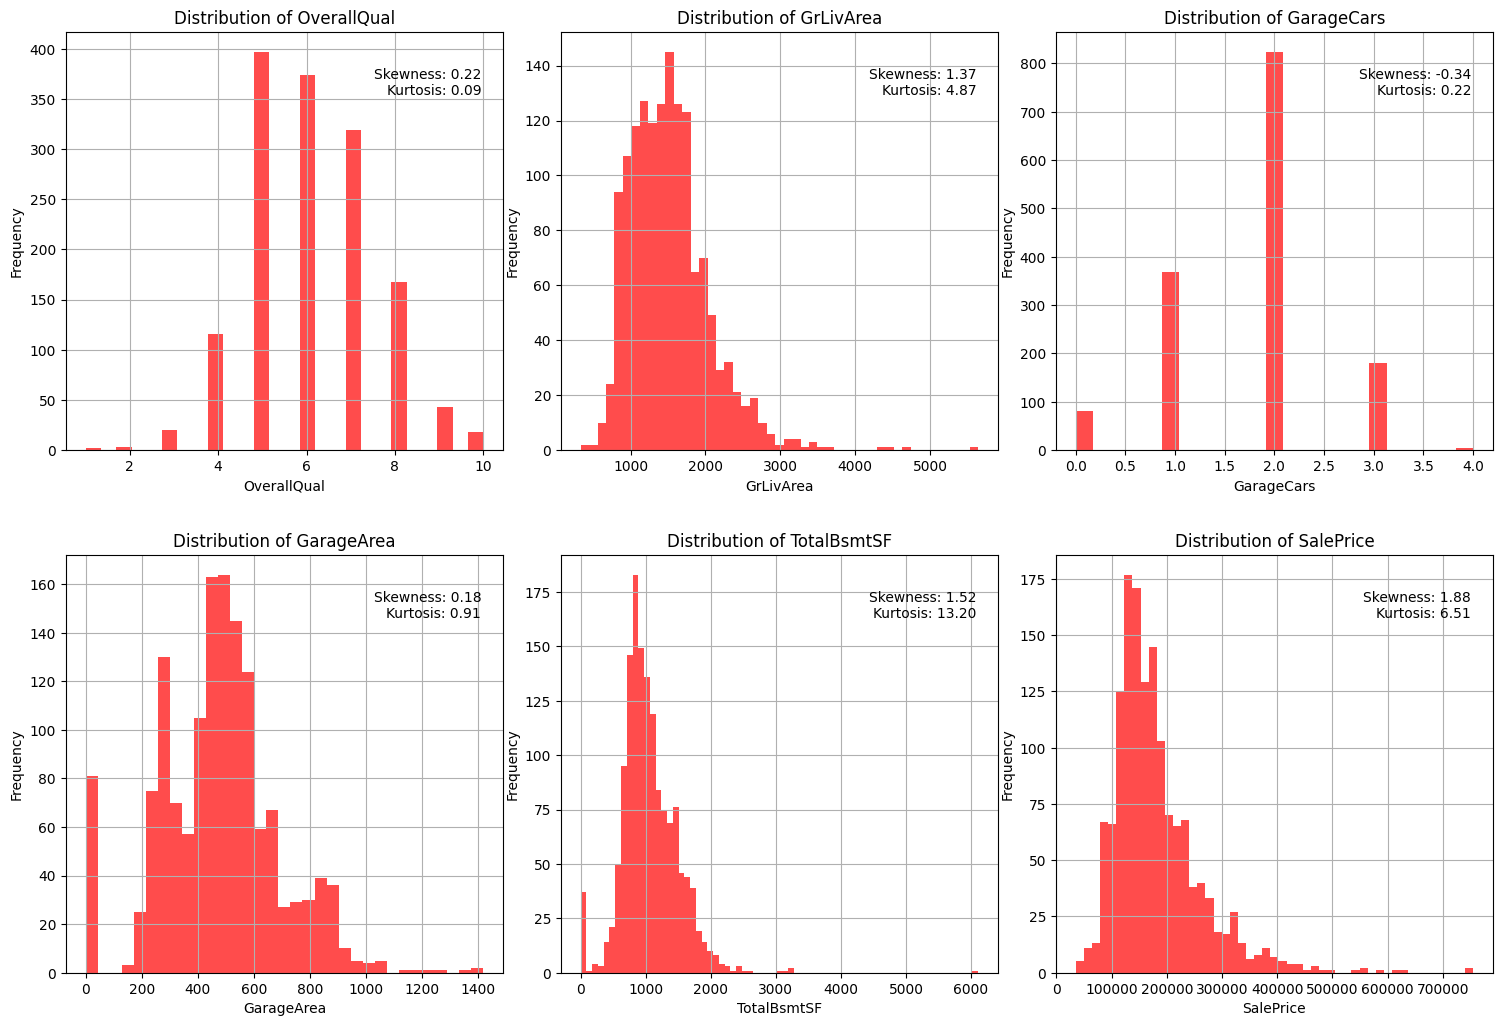

Column 'LotFrontage' has NaN values:
Has: '259.00' nan values
This is: '17.74'% of the total instances
---
Column 'Alley' has NaN values:
Has: '1369.00' nan values
This is: '93.77'% of the total instances
---
Column 'MasVnrType' has NaN values:
Has: '872.00' nan values
This is: '59.73'% of the total instances
---
Column 'MasVnrArea' has NaN values:
Has: '8.00' nan values
This is: '0.55'% of the total instances
---
Column 'BsmtQual' has NaN values:
Has: '37.00' nan values
This is: '2.53'% of the total instances
---
Column 'BsmtCond' has NaN values:
Has: '37.00' nan values
This is: '2.53'% of the total instances
---
Column 'BsmtExposure' has NaN values:
Has: '38.00' nan values
This is: '2.60'% of the total instances
---
Column 'BsmtFinType1' has NaN values:
Has: '37.00' nan values
This is: '2.53'% of the total instances
---
Column 'BsmtFinType2' has NaN values:
Has: '38.00' nan values
This is: '2.60'% of the total instances
---
Column 'Electrical' has NaN values:
Has: '1.00' nan values
T

In [18]:
data = pd.read_csv("House_Price.csv")
num_instances = data.shape[0]
num_features = data.shape[1]
num_categorical_features = len(data.select_dtypes(include = ['object']).columns)
num_numerical_features = len(data.select_dtypes(include = [np.number]).columns)

print(f"Number of instances: {num_instances}")
print(f"Number of features: {num_features}")
print(f"Number of categorical features: {num_categorical_features}")
print(f"Number of numerical features: {num_numerical_features}")

# FINDING TOP 5 FEATURES
numerical_data = data.select_dtypes(include = [np.number]) #removing the non numerical columns
correlation_matrix = numerical_data.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

top_numerical_features = correlation_with_target[1:6]
correlation_values = top_numerical_features.values
top_feature_names = top_numerical_features.index

print("\nTop 5 features and their correlation values")
for feature, correlation in zip(top_feature_names, correlation_values):
    print(f"{feature}: {correlation:.4f}")



# HISTOGRAMS
features_of_interest = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "SalePrice"]

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
fig.tight_layout()
plt.subplots_adjust(hspace = 0.25)

selected_data = data[features_of_interest]


# Plot histograms for each feature in subplots
for i, feature in enumerate(features_of_interest):
    row = i // 3
    col = i % 3

     # Determine the number of bins using the Freedman-Diaconis rule
    n = len(selected_data[feature])
    bin_width = 2 * (selected_data[feature].quantile(0.75) - selected_data[feature].quantile(0.25)) / (n ** (1/3))
    num_bins = round((selected_data[feature].max() - selected_data[feature].min()) / bin_width)
    
    ax = axes[row, col]
    ax.hist(selected_data[feature], bins = num_bins, color = 'red', alpha = 0.7)
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    ax.grid(True)
    
    # Calculate skewness and kurtosis
    skewness = skew(selected_data[feature])
    kurt = kurtosis(selected_data[feature])
    
    ax.text(0.95, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", transform=ax.transAxes, ha='right')

plt.show()

# finding missing data
for collumn in data.columns:
    nan_values = data[collumn].isna()
    if nan_values.any():
        print(f"Column '{collumn}' has NaN values:")
        x = len(data[nan_values].index.tolist())
        percent = (x/num_instances *100)
        # Print the indices of rows with NaN values
        print(f"Has: '{x:.2f}' nan values")
        print(f"This is: '{percent:.2f}'% of the total instances")
        print("---")



### 1.3

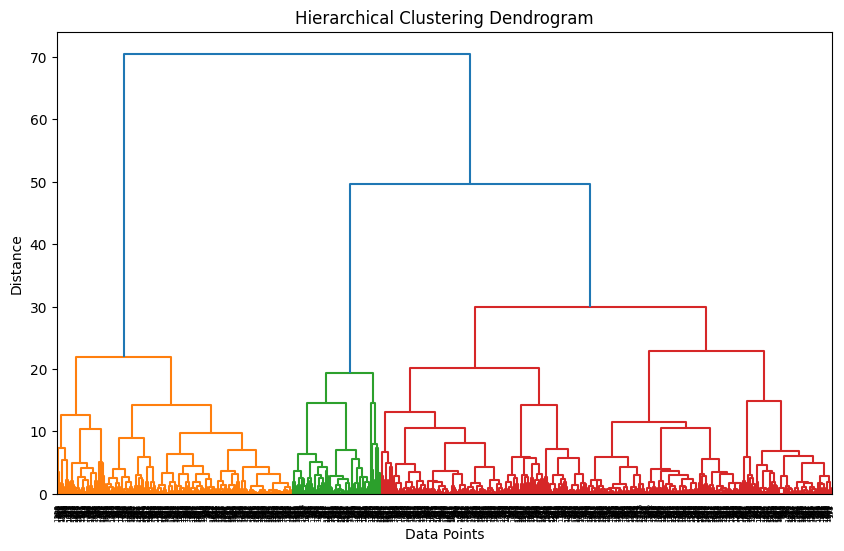

In [21]:
numerical_features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF"]
X = data[numerical_features]

X = X.fillna(0)  # Replace with appropriate handling of missing values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

##PART 2

In [27]:

X = data.iloc[:,:-1] # Features
y = data['SalePrice']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre